# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Fintech\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!

from newsapi.newsapi_client import NewsApiClient

In [4]:
# Create a newsapi client
# YOUR CODE HERE!
load_dotenv()
newsapi = NewsApiClient(api_key=os.environ["news_api"])

In [5]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!

bit_news = newsapi.get_everything(q="Bitcoin", language="en")

In [6]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!

eth_news = newsapi.get_everything(q="Ethereum", language="en")

In [10]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!

btc_sentiments = []

for article in bit_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)  #the VADER sentiment scores are retrieved
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bit_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bit_df = bit_df[cols]

bit_df.head()

,date,text,compound,positive,negative,neutral
0,2022-03-17,"When Russia invaded Ukraine, Niki Proshin was ...",0.0000,0.000,0.000,1.000
1,2022-03-12,"""Bitcoin was seen by many of its libertarian-l...",-0.7713,0.000,0.169,0.831
2,2022-02-22,Feb 22 (Reuters) - Bitcoin miners are feeling ...,-0.1779,0.046,0.067,0.887
3,2022-03-01,March 1 (Reuters) - Bitcoin has leapt since Ru...,0.0000,0.000,0.000,1.000
4,2022-03-08,Whose side is cryptocurrency on? If you had as...,-0.3182,0.055,0.091,0.854


In [15]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!

eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)  #the VADER sentiment scores are retrieved
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2022-03-01,"In February, shit hit the fan in the usual way...",-0.3182,0.059,0.093,0.848
1,2022-02-25,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812
2,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917
3,2022-03-13,"If it sounds too good to be true, youre not wr...",0.8340,0.236,0.050,0.713
4,2022-03-03,"It seems that in 2022, you cant escape from th...",-0.1326,0.000,0.044,0.956


In [16]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!

bit_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.001295,0.047700,0.043750,0.908500
std,0.406381,0.045767,0.061198,0.071992
min,-0.771300,0.000000,0.000000,0.739000
25%,-0.231275,0.000000,0.000000,0.861500
50%,0.000000,0.051500,0.000000,0.918000
75%,0.345300,0.075750,0.071000,0.952500
max,0.636900,0.152000,0.187000,1.000000


In [17]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!

eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.00000
mean,0.190925,0.078750,0.02975,0.89145
std,0.401422,0.085383,0.04006,0.10092
min,-0.526700,0.000000,0.00000,0.69200
25%,0.000000,0.000000,0.00000,0.84100
50%,0.025800,0.066500,0.00000,0.91050
75%,0.514625,0.120500,0.06125,1.00000
max,0.834000,0.249000,0.11500,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [19]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [20]:
# Instantiate the lemmatizer
# YOUR CODE HERE!

lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!



In [21]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text

    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)   
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    # Remove the stop words
    
    
    return tokens

In [26]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

big_string_btc = ' '.join(bit_df["text"])
tokens_btc=tokenizer(big_string_btc)

In [29]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!

big_string_eth = ' '.join(eth_df["text"])
tokens_eth=tokenizer(big_string_eth)

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [30]:
from collections import Counter
from nltk import ngrams

In [31]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!

bigram_btc = Counter(ngrams(tokens_btc, n=2))

In [32]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!

bitgram_etf= Counter(ngrams(tokens_eth, n=2))

In [33]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [34]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!

token_count(tokens_btc,10)

[('char', 20),
 ('bitcoin', 11),
 ('reuters', 7),
 ('russia', 5),
 ('march', 5),
 ('ha', 4),
 ('week', 4),
 ('crypto', 4),
 ('salvador', 4),
 ('ukraine', 3)]

In [35]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!

token_count(tokens_eth,10)

[('char', 20),
 ('ha', 7),
 ('past', 7),
 ('ethereum', 6),
 ('volume', 5),
 ('cryptocurrency', 5),
 ('hit', 4),
 ('year', 4),
 ('million', 4),
 ('billion', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

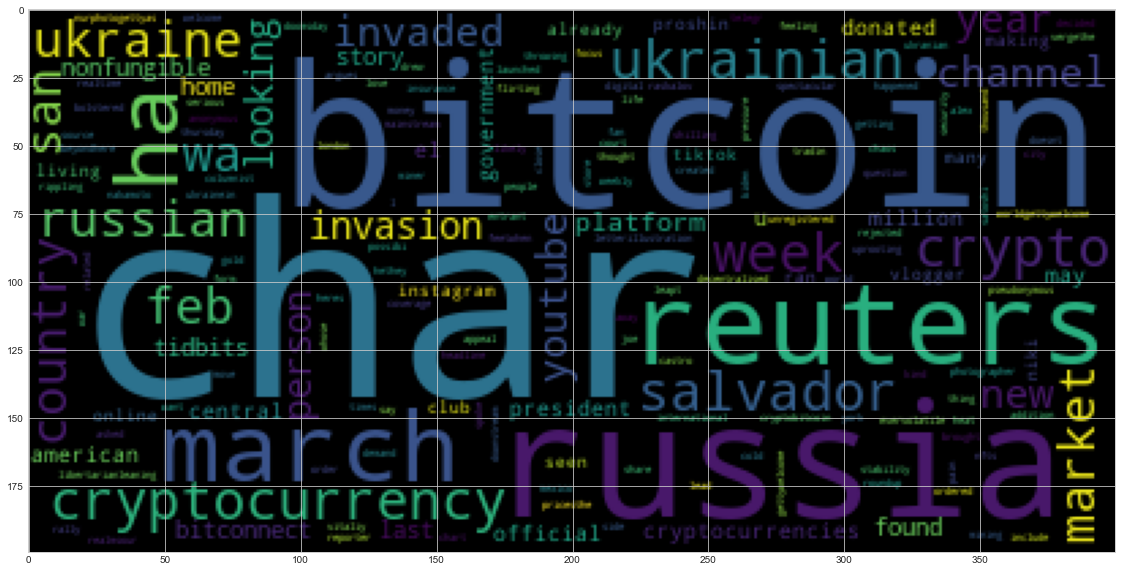

In [38]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!

input_btc=' '.join(tokens_btc)
wc_btc = WordCloud().generate(input_btc)
plt.imshow(wc_btc)

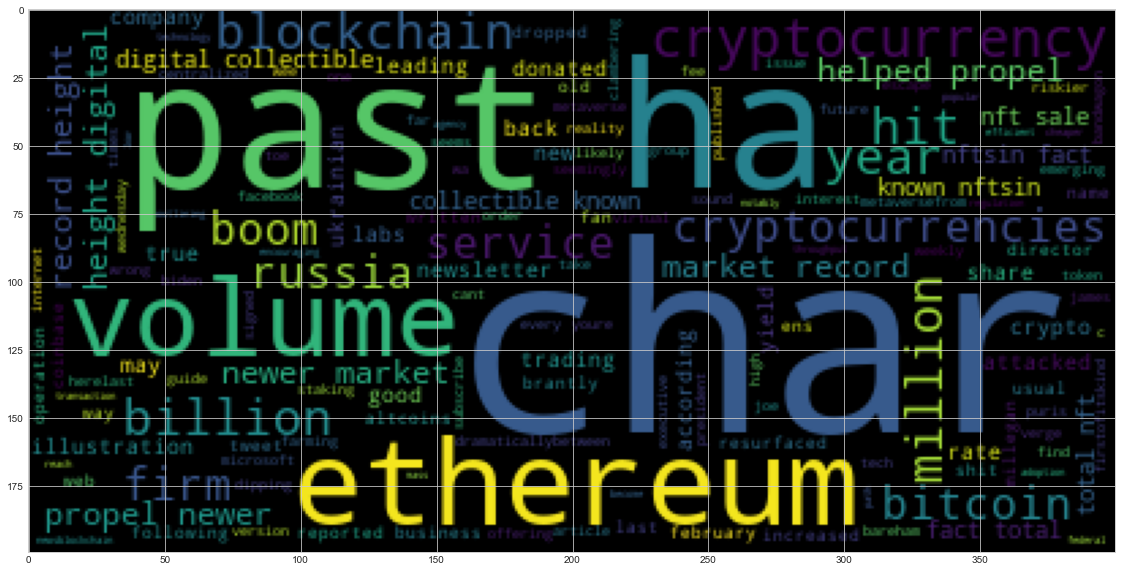

In [39]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!

input_eth=' '.join(tokens_eth)
wc_eth = WordCloud().generate(input_eth)
plt.imshow(wc_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [40]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm



In [41]:
# Load the spaCy model

# this loads the english model for spaCy
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [44]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

conct_bit=' '.join(bit_df["text"])

In [45]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
bit_ner = nlp(conct_bit)

# Add a title to the document
# YOUR CODE HERE!

bit_ner.user_data["title"] = "Bitcoin NER"

In [47]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(bit_ner, style='ent')

In [55]:
# List all Entities
# YOUR CODE HERE!

# by removing the 'if ent.label_ == 'GPE']' we can list ALL the entities in the df
#print([ent.text for ent in bit_ner.ents if ent.label_ == 'GPE'])

print([ent.text for ent in bit_ner.ents])



['Russia', 'Ukraine', 'Niki Proshin', 'a year', 'YouTube', 'TikTok', 'Instagram', 'Russian', 'the New York Times', 'Feb 22', 'Reuters', '2021', 'thousands', 'March 1', 'Reuters', 'Russia', 'Ukraine', 'Satoshi Nakamoto', '2008', 'Getty\r\nWelcome to', 'Nonfungible Tidbits', 'this week', 'Russia', 'Ukraine', 'Ukrainians', 'Russian', 'this week', 'Getty\r\nWelcome to', 'Nonfungible Tidbits', 'weekly', 'this week', 'YouTube', 'Alex Castro', 'Verge', 'BitConnect', 'Nurphoto/Getty', 'Russia', 'last Thursday', 'Ukranian', 'Mexico City', 'Telegr', 'LONDON', 'March 4', 'Reuters', 'Russia', 'Ukraine', 'Russia', 'March 15', 'Reuters', 'U.S.', 'Joe Biden', 'Reuters', 'BITCOIN', 'Summary</li><li>', 'Law firms</li><li>\r\n', 'documents</li></ul', 'Ukrainian', 'Tom Lee', 'Ukraine', 'SAN SALVADOR', 'March 11', 'Reuters', 'El Salvador', 'between March 15 and 20', 'Central American', 'two-week', 'Tuesday', 'Russians', 'Ukrainians', 'SAN SALVADOR', 'Feb 20', 'Reuters', 'El Salvador', 'Nayib Bukele', 'Sun

---

### Ethereum NER

In [56]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

conct_bit=' '.join(eth_df["text"])

In [62]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_ner = nlp(conct_bit)
# Add a title to the document
# YOUR CODE HERE!

eth_ner.user_data["title"] = "Ethereum NER"

In [63]:
# Render the visualization
# YOUR CODE HERE!

displacy.render(eth_ner, style='ent')

In [64]:
# List all Entities
# YOUR CODE HERE!

print([ent.text for ent in eth_ner.ents])

['February', 'Ethereum Name Service', 'ENS', 'May 201', 'Coinbase', 'last year', 'Between 2020 and 2021', 'James Bareham', 'More than $15 million', 'More than $15 million', 'Ukrainian', 'Russia', '2022', 'Facebook', 'Microsoft', 'the past few years', 'NFT', '$23 billion', 'TIME', 'weekly', 'Joe Biden', 'Wednesday', 'first', 'the past few years', 'NFT', '$23 billion', 'the past few years', 'NFT', '$23 billion', 'Ethereum', '$450 million', 'Series', 'US', 'over $7 billion', 'Russia', 'Ukraine', 'the days', 'March 11', 'Yuga Labs', 'Meebits', 'Larva Labs', 'more than a dozen', 'Ethereum', 'American Express', 'Tuesday', 'more than $4 million', 'Russia', 'Elliptic', 'Ukraine', 'Russia', 'Elliptic', 'nearly $55 million', 'Russia', 'Ukraine', 'Bloomberg', 'Getty Images', 'Bitcoin, Ethereum', 'DogeCoin', 'Binance', 'June 28, 2021', 'REUTERS', 'Dado Ruvic/Illus']


---